In [5]:
import engine as ng
import test_suite as tst

test1 = tst.Test1()
scheme = ng.MUSCL(test1)

scheme.compute(10)

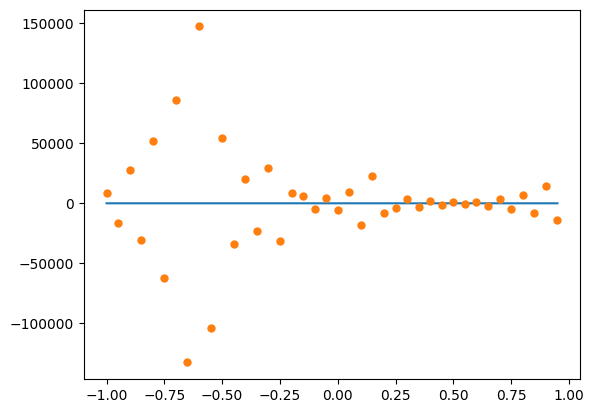

In [6]:
import matplotlib.pyplot as plt
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF[2:-2], marker = "o", markersize=5, linestyle = "None")